In [1]:
import pandas as pd
import subprocess
import os
%matplotlib inline
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
git_pull = subprocess.Popen("/usr/bin/git pull",
                           cwd = os.path.dirname('../data/raw/covid-19/'),
                           shell = True,
                           stdout = subprocess.PIPE,
                           stderr = subprocess.PIPE)
(out, error) = git_pull.communicate()

print("Error :" +str(error))
print("out :" +str(out))

Error :b'The system cannot find the path specified.\r\n'
out :b''


In [3]:
pd.set_option('display.max_rows',500)

In [4]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [5]:
pd_raw

Province/State  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
5                                             NaN   
6                                             NaN   
7                                             NaN   
8                                             NaN   
9                    Australian Capital Territory   
10                                New South Wales   
11                             Northern Territory   
12                                     Queensland   
13                                South Australia   
14                                       Tasmania   
15                                       Victoria   
16                              Western Australia   
17                                            NaN   
18                                            NaN   
19                                            NaN   
20                                            NaN   
21                                            NaN   
22                                            NaN   
23                                            NaN   
24                                            NaN   
25                                            NaN   
26                                            NaN   
27                                            NaN   
28                                            NaN   
29                                            NaN   
30                                            NaN   
31                                            NaN   
32                                            NaN   
33                                            NaN   
34                                            NaN   
35                                            NaN   
36                                            NaN   
37                                            NaN   
38                                            NaN   
39                                            NaN   
40                                        Alberta   
41                               British Columbia   
42                               Diamond Princess   
43                                 Grand Princess   
44                                       Manitoba   
45                                  New Brunswick   
46                      Newfoundland and Labrador   
47                          Northwest Territories   
48                                    Nova Scotia   
49                                        Nunavut   
50                                        Ontario   
51                           Prince Edward Island   
52                                         Quebec   
53                         Repatriated Travellers   
54                                   Saskatchewan   
55                                          Yukon   
56                                            NaN   
57                                            NaN   
58                                            NaN   
59                                          Anhui   
60                                        Beijing   
61                                      Chongqing   
62                                         Fujian   
63                                          Gansu   
64                                      Guangdong   
65                                        Guangxi   
66                                        Guizhou   
67                                         Hainan   
68                                          Hebei   
69                                   Heilongjiang   
70                                          Henan   
71                                      Hong Kong   
72                                          Hubei   
73                                          Hunan   
74                                 Inner Mongolia   
75     

## Web Scrapping

In [6]:
import requests
from bs4 import BeautifulSoup

In [7]:
page = requests.get('https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html|')

In [8]:
soup = BeautifulSoup(page.content, 'html.parser')

In [9]:
html_table = soup.find('table')

In [10]:
all_rows = html_table.find_all('tr')

In [11]:
final_data_list = []

In [12]:
for pos, rows in enumerate(all_rows):
    col_list = [each_col.get_text(strip = True) for each_col in rows.find_all('td')]
    final_data_list.append(col_list)

In [13]:
pd.DataFrame(final_data_list).dropna().rename(columns = {0:'state'} )

state           1        2        3       4        5
2         Baden-Württem­berg   4.092.867   23.901   94.338   849,7   16.472
3                     Bayern   5.447.332   32.840  117.019   890,5   24.650
4                     Berlin   1.155.837    4.529   18.092   493,8    4.679
5               Branden­burg     857.870    2.946   12.390   489,5    5.742
6                     Bremen     231.103      745    5.070   745,4      802
7                    Hamburg     671.628    3.000    9.882   533,4    2.766
8                     Hessen   2.200.483   17.639   67.369  1070,5   10.537
9   Meck­lenburg-Vor­pommern     539.027    2.187    9.496   589,5    2.287
10            Nieder­sachsen   2.838.752   17.976   73.133   913,8    9.860
11     Nord­rhein-West­falen   6.083.027   29.530  111.780   623,6   26.064
12          Rhein­land-Pfalz   1.330.478    6.819   30.700   749,1    5.852
13                  Saarland     366.752    2.679   11.270  1145,3    1.745
14                   Sachsen   1.613.399    5.919   20.319   500,8   15.654
15            Sachsen-Anhalt     771.889    2.707   11.005   504,7    5.444
16       Schles­wig-Holstein     907.107    5.221   18.806   646,1    2.674
17                 Thüringen     746.129    2.053    8.212   387,3    7.407
18                    Gesamt  29.853.680  160.691  618.881   744,2  142.635

## API Calls

In [14]:
data = requests.get('https://services7.arcgis.com/mOBPykOjAyBO2ZKk/arcgis/rest/services/Coronafälle_in_den_Bundesländern/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json')

In [15]:
import json

In [16]:
json_object = json.loads(data.content)

In [17]:
type(json_object)

dict

In [18]:
json_object.keys()

dict_keys(['objectIdFieldName', 'uniqueIdField', 'globalIdFieldName', 'geometryProperties', 'geometryType', 'spatialReference', 'fields', 'features'])

In [19]:
json_object

{'objectIdFieldName': 'OBJECTID_1',
 'uniqueIdField': {'name': 'OBJECTID_1', 'isSystemMaintained': True},
 'globalIdFieldName': 'GlobalID',
 'geometryProperties': {'shapeAreaFieldName': 'Shape__Area',
  'shapeLengthFieldName': 'Shape__Length',
  'units': 'esriMeters'},
 'geometryType': 'esriGeometryPolygon',
 'spatialReference': {'wkid': 4326, 'latestWkid': 4326},
 'fields': [{'name': 'OBJECTID_1',
   'type': 'esriFieldTypeOID',
   'alias': 'OBJECTID_1',
   'sqlType': 'sqlTypeOther',
   'domain': None,
   'defaultValue': None},
  {'name': 'LAN_ew_AGS',
   'type': 'esriFieldTypeString',
   'alias': 'AGS',
   'sqlType': 'sqlTypeOther',
   'length': 8,
   'domain': None,
   'defaultValue': None},
  {'name': 'LAN_ew_GEN',
   'type': 'esriFieldTypeString',
   'alias': 'GEN',
   'sqlType': 'sqlTypeOther',
   'length': 60,
   'domain': None,
   'defaultValue': None},
  {'name': 'LAN_ew_BEZ',
   'type': 'esriFieldTypeString',
   'alias': 'BEZ',
   'sqlType': 'sqlTypeOther',
   'length': 40,
  

In [20]:
full_list = []
for pos,each_dict in enumerate (json_object['features'][:]):
    full_list.append(each_dict['attributes'])

In [21]:
pd.DataFrame(full_list)

OBJECTID_1 LAN_ew_AGS              LAN_ew_GEN            LAN_ew_BEZ  \
0            1         01      Schleswig-Holstein                  Land   
1            2         02                 Hamburg  Freie und Hansestadt   
2            3         03           Niedersachsen                  Land   
3            4         04                  Bremen      Freie Hansestadt   
4            5         05     Nordrhein-Westfalen                  Land   
5            6         06                  Hessen                  Land   
6            7         07         Rheinland-Pfalz                  Land   
7            8         08       Baden-Württemberg                  Land   
8            9         09                  Bayern             Freistaat   
9           10         10                Saarland                  Land   
10          11         11                  Berlin                  Land   
11          12         12             Brandenburg                  Land   
12          13         13  Mecklenburg-Vorpommern                  Land   
13          14         14                 Sachsen             Freistaat   
14          15         15          Sachsen-Anhalt                  Land   
15          16         16               Thüringen             Freistaat   

    LAN_ew_EWZ  OBJECTID  Fallzahl  Aktualisierung AGS_TXT  \
0      2910875        15    907107   1658181600000      01   
1      1852478         6    671628   1658181600000      02   
2      8003421         9   2838752   1658181600000      03   
3       680130         5    231103   1658181600000      04   
4     17925570        10   6083027   1658181600000      05   
5      6293154         7   2200483   1658181600000      06   
6      4098391        11   1330478   1658181600000      07   
7     11103043         1   4092867   1658181600000      08   
8     13140183         2   5447332   1658181600000      09   
9       983991        12    366752   1658181600000      10   
10     3664088         3   1155837   1658181600000      11   
11     2531071         4    857870   1658181600000      12   
12     1610774         8    539027   1658181600000      13   
13     4056941        13   1613399   1658181600000      14   
14     2180684        14    771889   1658181600000      15   
15     2120237        16    746129   1658181600000      16   

                                GlobalID  faelle_100000_EW   Shape__Area  \
0   fc5ba936-c95c-432c-8a33-9eb2f30b660f      31162.691631  4.573731e+10   
1   0f3e860c-5181-4d3f-a421-1d51f50315ea      36255.653239  2.089396e+09   
2   3fd77024-c29b-4843-9be8-682ad48e60c9      35469.232469  1.299836e+11   
3   4132268b-54de-4327-ac1e-760e915112f1      33979.239263  1.119157e+09   
4   561d658f-3ee5-46e3-bc95-3528c6558ab9      33934.915319  8.782936e+10   
5   93277ac4-e8fc-48c7-8940-028dc2ed66af      34966.298298  5.235913e+10   
6   e9b4296f-9be2-4e53-9a58-ccf1396cb03d      32463.422841  4.783877e+10   
7   80394ddf-c6a4-4a6e-be8e-0259a81b22a9      36862.570018  8.151732e+10   
8   1ff920f4-62cd-4a4f-b8c9-f042f2a3e00a      41455.526152  1.634855e+11   
9   e3396a6f-8a30-4fdf-8df7-def77dd38bea      37271.885617  6.060692e+09   
10  c7033073-2bb0-486b-97af-5b3c639e7219      31545.012019  2.402458e+09   
11  b560af89-5895-4be4-96f8-0f581cd8a858      33893.557312  7.980197e+10   
12  a27f5628-e790-45be-898d-f0a6841c0f7e      33463.850298  6.587352e+10   
13  256d2405-a7c8-4fec-93df-29f3c808cd25      39768.855401  4.662650e+10   
14  66106bbe-f04b-4f92-80e1-5b5b30da25b5      35396.646190  5.417701e+10   
15  3a3e2817-bb19-4f8c-8bca-d8ff591140d4      35190.830082  4.068521e+10   

    Shape__Length  Death  cases7_bl_per_100k  cases7_bl  death7_bl  \
0    2.881496e+06   2674          646.060033      18806          3   
1    4.188002e+05   2766          533.447631       9882          6   
2    4.008988e+06   9860          913.771748      73133          6   
3    3.357177e+05    802          745.445724       5070          1   
4    2.648673e+06  26064      

url_endpoint = 'https://api.smartable.ai/coronavirus/stats/US'
headers = {
    'Cache-control': 'no-cache',
    'Subscription-key': '28ee4219700f48718be78b057beb7eb4',
} 
response = requests.get(url_endpoint,headers = headers)

In [22]:
df_plot = pd.read_csv('../data/processed/COVID_small_flat_table.csv', sep = ',')
df_plot.head()

date  Italy  US  Spain  Germany  Korea, South
0  1/22/20      0   1      0        0             1
1  1/23/20      0   1      0        0             1
2  1/24/20      0   2      0        0             2
3  1/25/20      0   2      0        0             2
4  1/26/20      0   5      0        0             3

<Figure size 432x288 with 0 Axes>

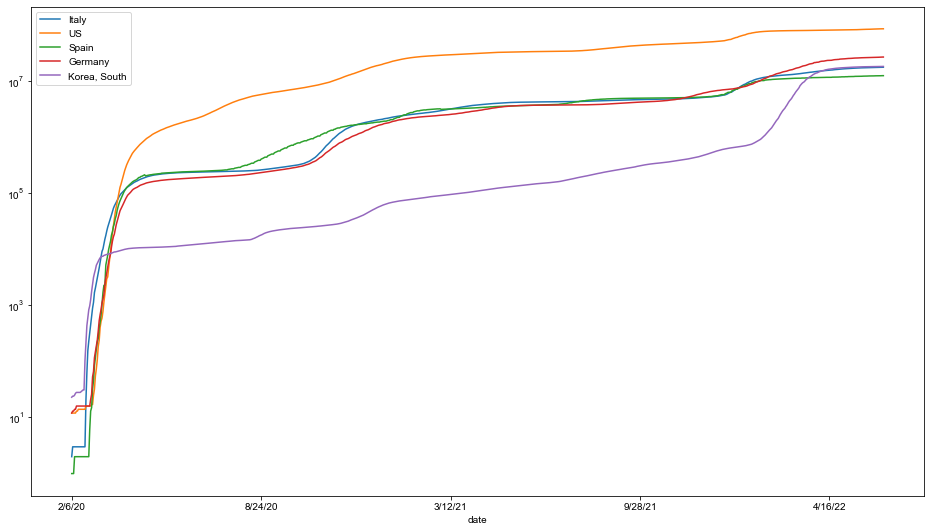

In [23]:
import seaborn as sns

plt.figure();
mpl.rcParams['figure.figsize'] = (16, 9)
ax = df_plot.iloc[15:,:].set_index('date').plot()
#plt.ylim(10,3000)
ax.set_yscale('log')
sns.set(style = "darkgrid")

## Plot.ly

In [24]:
import plotly.graph_objects as go
import plotly

In [25]:
plotly.__version__

'5.6.0'

In [26]:
fig = go.Figure()
country_list = ['Italy',
               'US',
               'Spain',
               'Germany',
               'Korea, South',]

for each in country_list:
    fig.add_trace(go.Scatter(x = df_plot.date, y = df_plot[each] , mode = 'markers+lines', 
                             line_width = 0.5, marker_size = 3, name = each, opacity = 0.9))

    

fig.update_layout(
    height = 1000,
    width = 1000,
    xaxis_title = "Time",
    yaxis_title = "Confirmed infected people (source John Hopkins case, log-scale)",
    
)
#fig.update_yaxes(type = "log", range = [-5.5,5.5])
fig.update_layout(xaxis_rangeslider_visible = True)
#fig.show(renderer = 'chrome')

In [27]:
import dash
from dash import dcc
from dash import html

In [28]:
app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-select country'),
    dcc.Dropdown(
        id = 'country_drop_down',
        options = [
            {'label': 'Italy', 'value' : 'Italy'},
            {'label': 'US', 'value' : 'US'},
            {'label': 'Spain', 'value' : 'Spain'},
            {'label': 'Germany', 'value' : 'Germany'},
            {'label': 'Korea, South', 'value' : 'Korea, South'}
        ],
        value = ['US', 'Germany'],
        multi = True

    ),
    
    dcc.Graph(figure = fig, id = 'main_window_slope')
])

In [29]:
from dash.dependencies import Input, Output

@app.callback (
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = []
    for each in country_list:
        traces.append(dict(x = df_plot.date,
                          y = df_plot[each],
                          mode = 'markers+lines',
                          line_width = 0.5, 
                           marker_size = 3, 
                           name = each, 
                           opacity = 0.9
                          )
                     ) 
        
        return {
            'data' : traces,
            'layout': dict(
                height = 1000,
                width = 1000,
                xaxis_title = "Time",
                yaxis_title = "Confirmed infected people (source John Hopkins case, log-scale)",
            )
            
        }


In [ ]:
app.run_server(debug = True, use_reloader = False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"
df_country_info=pd.read_csv(url,sep=',')